# Housing Price 
Code to accompany Lecture on  
Regression  
Jiaming Mao (<jmao@xmu.edu.cn>)  
<https://jiamingmao.github.io>  
credit: Caudill, M. (<https://github.com/mscaudill/IntroStatLearn>)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston # boston housing data
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot') 

## Load Data

In [2]:
boston = load_boston()
predictors = boston.data
response = boston.target #MEDV (median home values)
boston_data = np.column_stack([predictors,response])
col_names = np.append(boston.feature_names, 'MEDV')
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Simple Linear Regression
Regress LSTAT (% of households with low economic status) on MEDV (median home values)

In [3]:
# using scikit-learn
x = boston_df.LSTAT.values
y = boston_df.MEDV.values
ols = LinearRegression(fit_intercept=True)
ols.fit(x[:,np.newaxis], y)
print("slope:    ", ols.coef_[0])
print("intercept:", ols.intercept_)

slope:     -0.950049353758
intercept: 34.5538408794


In [4]:
# using statsmodels
X = sm.add_constant(x)
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           5.08e-88
Time:                        23:58:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

column_names:  ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


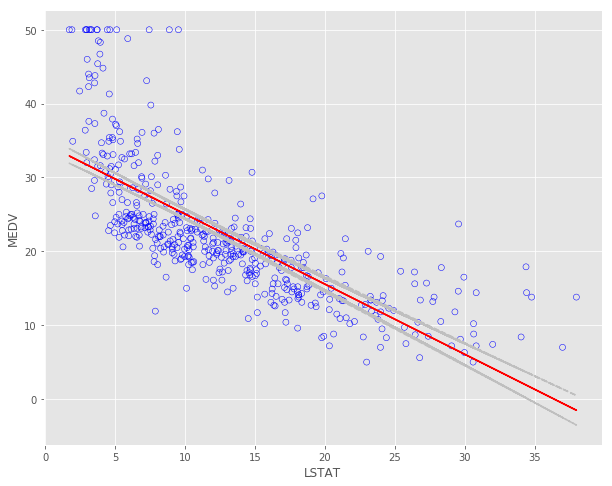

In [5]:
result, data, colnames = summary_table(ols, alpha=0.05)
print('column_names: ', colnames)
ci_low, ci_high = data[:,4:6].T

plt.figure(figsize=(10,8))
plt.scatter(x, y, facecolor='None', edgecolor='b', label='')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(x, ols.fittedvalues, color='r')
plt.plot(x, ci_low, '--', color='.75')
plt.plot(x, ci_high, '--', color='.75')

## Multiple Linear Regression
Regress LSTAT and AGE on MEDV

In [6]:
X = sm.add_constant(boston_df[['LSTAT','AGE']])
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           2.98e-88
Time:                        23:58:26   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

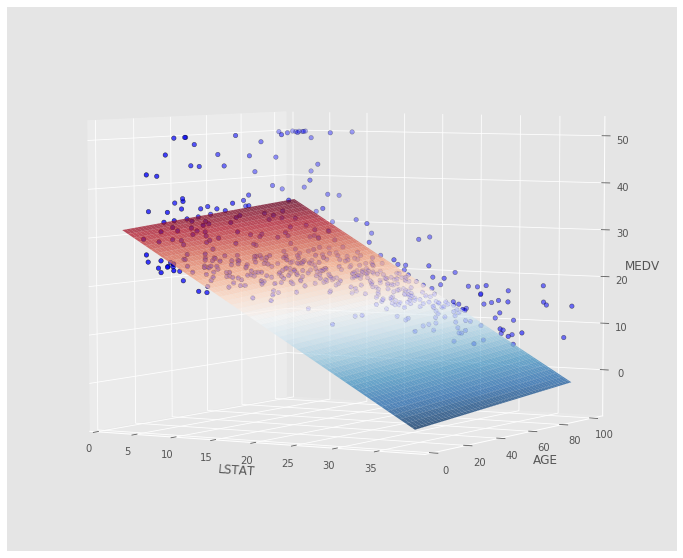

In [7]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d',azim=-60, elev=5)
ax.scatter(X.loc[:,'LSTAT'], X.loc[:,'AGE'], y, facecolors='b', edgecolor='k', depthshade=True);
ax.set_xlabel('LSTAT');
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
xx1, xx2 = np.meshgrid(np.linspace(X.LSTAT.min(), X.LSTAT.max(), 100), 
                       np.linspace(X.AGE.min(), X.AGE.max(), 100))
Z = ols.params[0] + ols.params[1] * xx1 + ols.params[2] * xx2
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.75, linewidth=0)

## Interaction Terms

In [8]:
ols = smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.86e-88
Time:                        23:58:27   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Polynomial Regression

In [9]:
quadratic_fit = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', data=boston_df).fit()
print(quadratic_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          1.56e-112
Time:                        23:58:27   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

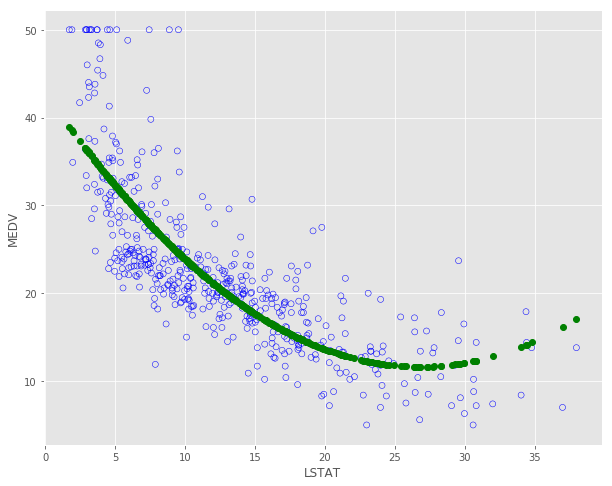

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, facecolor='None', edgecolor='b', label='')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(x, quadratic_fit.fittedvalues, color='g', marker='o', linestyle='none')